In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read the data from a csv
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [3]:
sales_data.shape

(8190, 12)

### identifying Null values
#### 2 options - should be analgous
- df.isna()
- df.isnull()

calling these functions on the data frames will identify via boolean whether values are Null (True) or non-null (False)

In [5]:
sales_data.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [6]:
sales_data.isna()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [7]:
#counting Null values in each field - Treats nulls true which are treated as a value of 1 and sums
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
#note that count just counts records regardless of Null status
sales_data.isna().count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       8190
MarkDown2       8190
MarkDown3       8190
MarkDown4       8190
MarkDown5       8190
CPI             8190
Unemployment    8190
IsHoliday       8190
dtype: int64

### visualizing NULL values
seaborn's barplot function is build to depict a summary of one quantitative variable against levels of a second qualitative variable but can be used here on the summarized null value sums above

In [10]:
sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=0)

KeyError: "['Date' 'Temperature' 'Fuel_Price'] not found in axis"

In [11]:
#dropping columns without any nulls
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1) #dropping on axis 1 will drop the columns
na_counts = na_counts.isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [15]:
#returns an index object with the index values and the dtype
na_counts.index

Index(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [17]:
#returns the values list of the index object as an array
na_counts.index.values

array(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

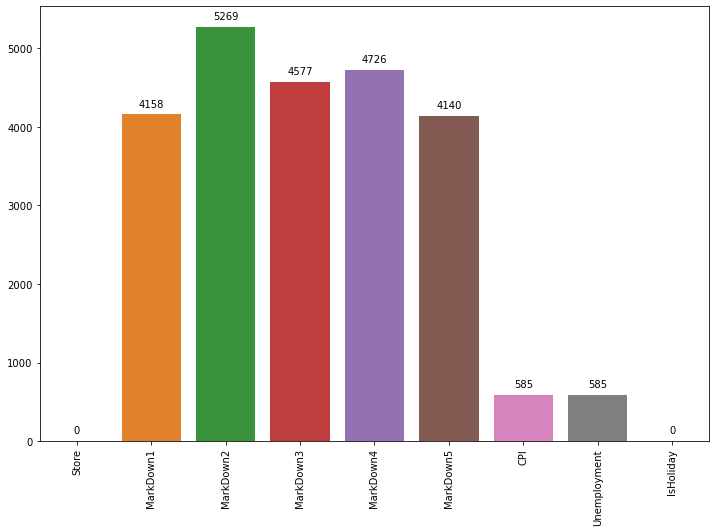

In [43]:
#sns.barplot(categorical_values, quantitative values)
sns.barplot(x=na_counts.index.values, y=na_counts)

#rotating the index
plt.xticks(rotation=90)

#plotting the values in text
for i in range(na_counts.shape[0]):
    val = na_counts[i]
    plt.text(i, val+200, val, ha='center', va='top')
    
from matplotlib import rcParams
rcParams['figure.figsize']=12,8

sns.barplot is useful for plotting bar charts of data that is already summarized!